In [67]:
import pandas as pd
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
import warnings
warnings.simplefilter("ignore")
import pandas as pd
df = pd.read_csv("insurance.csv")

In [68]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [69]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex']= encoder.transform(df['sex'])

encoder.fit(df['region'])
df['region']= encoder.transform(df['region'])

encoder.fit(df['smoker'])
df['smoker']= encoder.transform(df['smoker'])
# breast_cencer.drop('id',axis=1,inplace=True)
# df.drop('Unnamed: 32',axis=1,inplace=True)
# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
# breast_cancer.head()
df.dropna()

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [71]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex']= encoder.transform(df['sex'])

encoder.fit(df['region'])
df['region']= encoder.fit_transform(df['region'])

encoder.fit(df['smoker'])
df['smoker']= encoder.fit_transform(df['smoker'])
# breast_cencer.drop('id',axis=1,inplace=True)
# df.drop('Unnamed: 32',axis=1,inplace=True)
# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
# breast_cancer.head()
df.dropna()

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [72]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

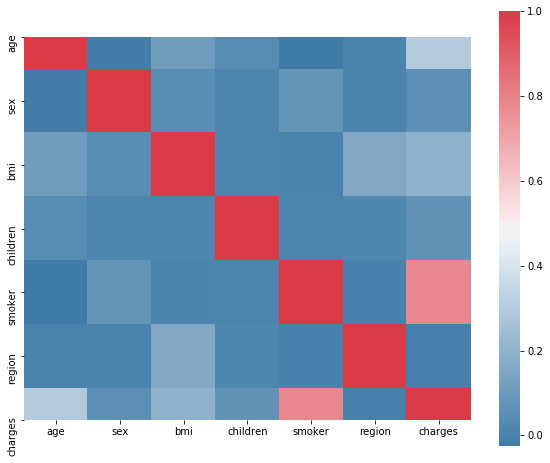

In [73]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [74]:
df[(df.smoker == 1)]["charges"]

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

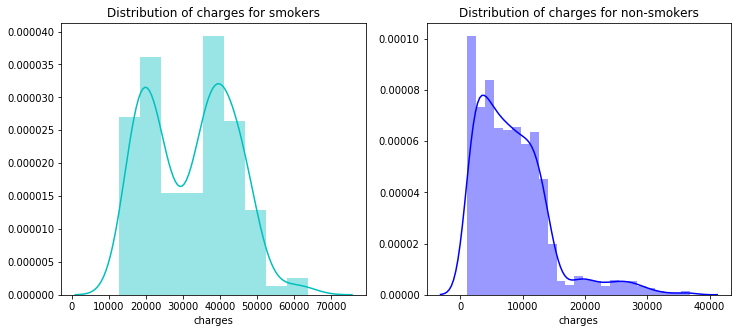

In [75]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
     

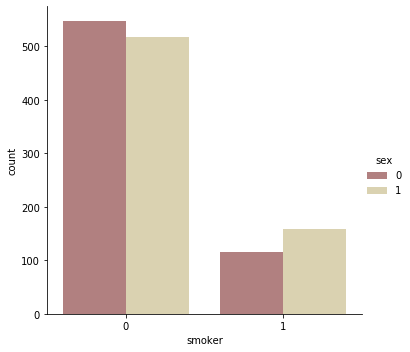

In [76]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)


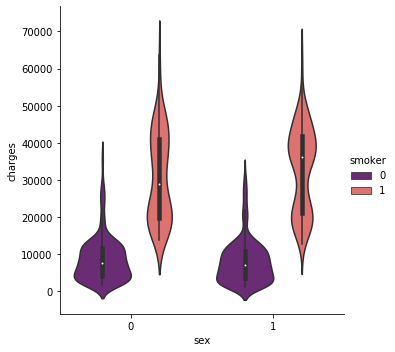

In [77]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')
     

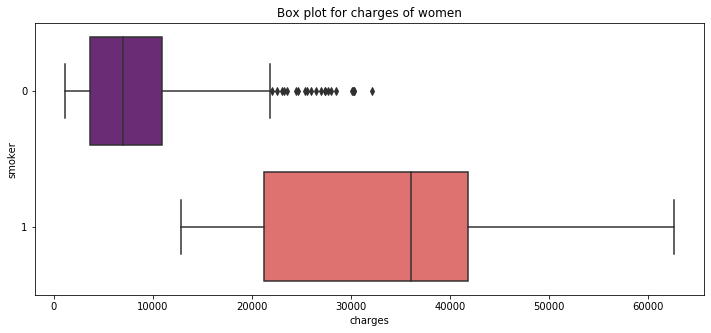

In [78]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

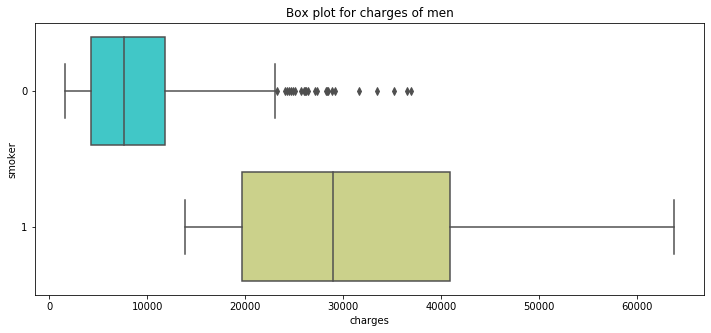

In [79]:


pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

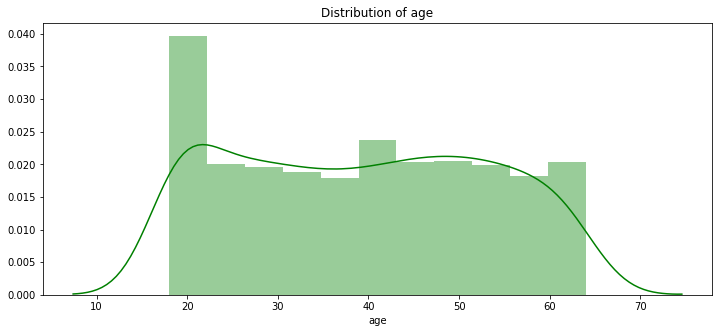

In [80]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

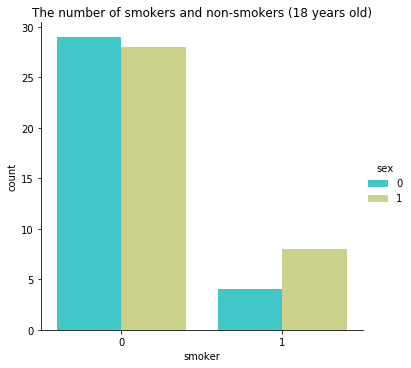

In [81]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")


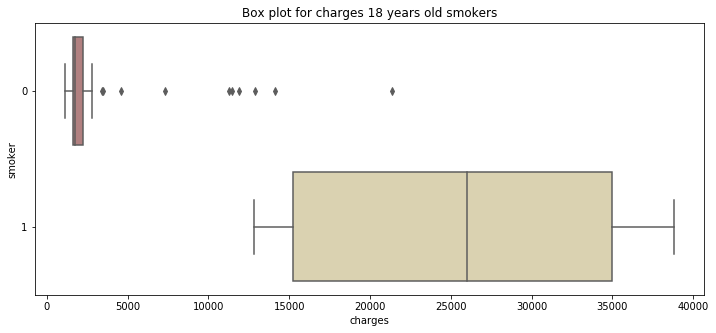

In [82]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')
     

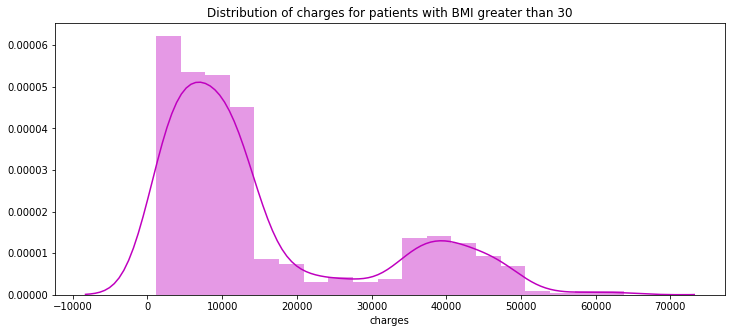

In [83]:

pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

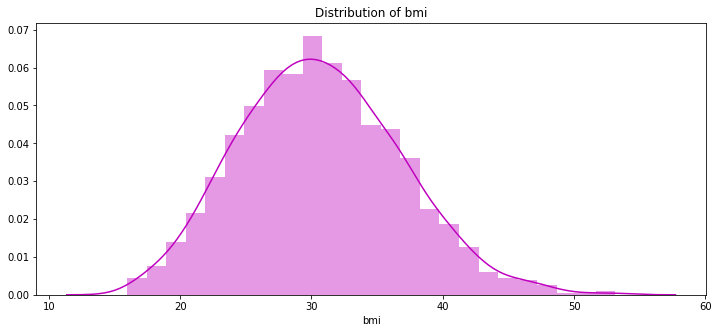

In [84]:


pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

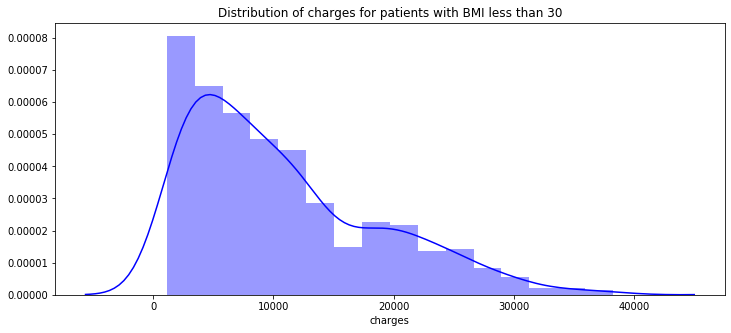

In [85]:

pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

In [86]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,0:5])
y = df.iloc[:,6].values
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

In [88]:
#using DecisionTree Resressor Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 342422.6459329088
MAE: 35.778270747663555
r2_score: 0.9973968041979693


In [89]:
#using RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=25, criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 4648787.905863801
MAE: 1123.8836621411838
r2_score: 0.9646585723671826


In [90]:
#using SVR model
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='poly', gamma='auto', epsilon=0.3,degree=3).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 23406563.288778547
MAE: 2063.377803663423
r2_score: 0.8220565490716616


In [91]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,0:5])
y = np.asarray(df.iloc[:, 6].values,dtype=int)
print(y)
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

[16884  1725  4449 ...  1629  2007 29141]
[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631 ]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631 ]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631 ]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631 ]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663]]


In [92]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#Finding the best parameter (max_depth) for the DecisionTreeRegressor Model 

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_) 

MSE: 342409.2345794393
MAE: 35.777570093457946
r2_score: 0.9973969037461801
best score and parameter:  0.8509529217280611 {'max_depth': 4}


In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=25, criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#Finding the best parameter (n_estimator) for the RandomForestRegressor Model 

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10)}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_)

MSE: 4707052.355694413
MAE: 1122.7475015576324
r2_score: 0.9642155960872615
best score and parameter:  0.8165947113918399 {'n_estimators': 60}


In [57]:
import pandas as pd
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
import warnings
warnings.simplefilter("ignore")
import pandas as pd
df = pd.read_csv("insurance.csv")

In [58]:
nominal = df[["age","bmi"]]
categorical = df[["sex","smoker"]]

In [59]:
categorical = pd.get_dummies(categorical)

In [60]:
feature = pd.concat([nominal, categorical], axis = 1)

In [61]:
feature

age     bmi  sex_female  sex_male  smoker_no  smoker_yes
0      19  27.900           1         0          0           1
1      18  33.770           0         1          1           0
2      28  33.000           0         1          1           0
3      33  22.705           0         1          1           0
4      32  28.880           0         1          1           0
...   ...     ...         ...       ...        ...         ...
1333   50  30.970           0         1          1           0
1334   18  31.920           1         0          1           0
1335   18  36.850           1         0          1           0
1336   21  25.800           1         0          1           0
1337   61  29.070           1         0          0           1

[1338 rows x 6 columns]

In [62]:
y = df['charges'].values

In [63]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [64]:
x_columns = len(feature.columns)

In [65]:
x = feature.iloc[:, 0:x_columns].values

In [66]:
x

array([[19.  , 27.9 ,  1.  ,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  0.  ,  1.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  1.  ,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  1.  ,  0.  ,  1.  ,  0.  ],
       [61.  , 29.07,  1.  ,  0.  ,  0.  ,  1.  ]])

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

AxesSubplot(0.125,0.125;0.62x0.755)


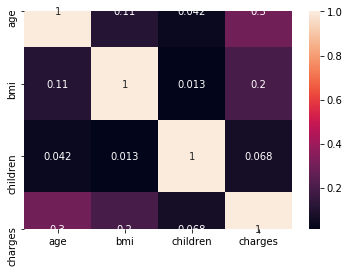

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.heatmap(data= df.corr(),annot = True))

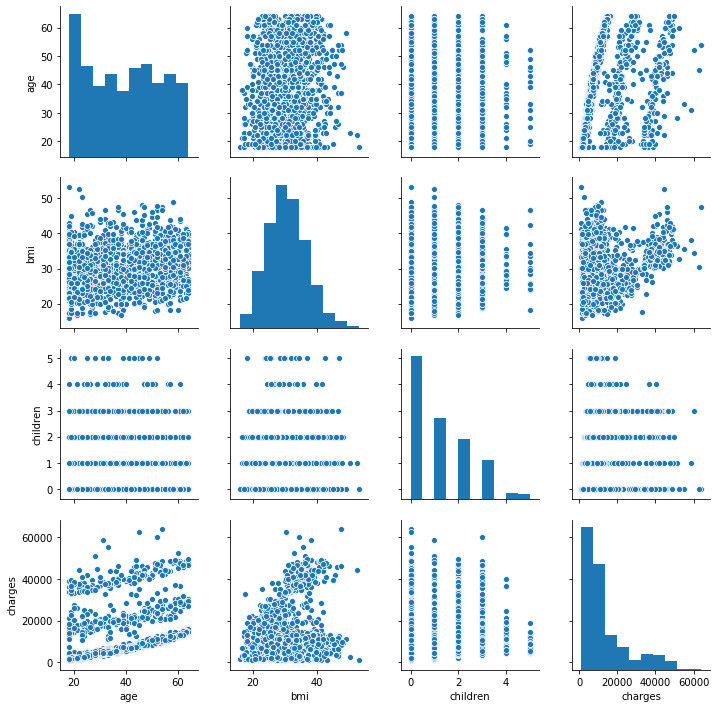

In [128]:
sns.pairplot(df)

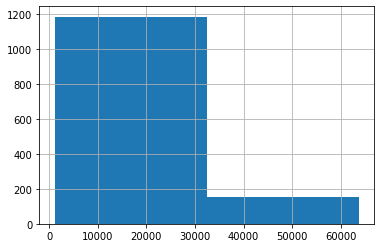

In [129]:
df['charges'].hist(bins=2)

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test,test_size=0.5, random_state=0)

In [131]:
y_train

array([1260,    5, 1239, ...,  392,   42,  339], dtype=int64)

In [132]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
results = model.score(x_test,y_test)

results_validate = model.score(x_validate,y_validate)

print(results)
print(results_validate)

0.0
0.0


In [133]:
from sklearn.svm import SVR
reg = SVR(kernel='linear')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(reg.score(x_test, y_test))

0.6803464718832355


In [134]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=1000, 
criterion='entropy')
model.fit(x_train, y_train)

results = model.score(x_test,y_test)

results_validate = model.score(x_validate,y_validate)


print(results)
print(results_validate)

0.0
0.0
